# Bibliotecas

In [2]:
# Imports
import numpy as np
import pandas as pd
from scipy.stats import zscore

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

### Objetivo: Prever se a renda anual de um indivíduo excede $50K/ano com base em dados do censo. Também conhecido como conjunto de dados "Census Income".
- age: N/A
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: N/A
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: N/A
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: N/A
- capital-loss: N/A
- hours-per-week: N/A
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- income: >50K, <=50K.

#### dados: https://archive.ics.uci.edu/dataset/2/adult

# Carga dos dados

In [19]:
# carrega features
df_abt = pd.read_csv("../data/abt.csv", sep=r",")

# EDA

In [17]:
# Função para análise exploratória básica

def analyze_dataframe(df: pd.DataFrame, z_treshold: float = 3.0) -> None:
    '''
    Analisa um dataframe Pandas e imprime:
    1. Estatísticas descritivas para as colunas numéricas
    2. Contagem de categorias de colunas categóricas
    3. Percentual de valores nulos por coluna
    4. Número de linhas duplicadas
    5. Contagem de outliers das colunas numéricas baseado no treshold z-score

    Parâmetros:
    df: pd.DataFrame
        Imputa o Dataframe a ser analizado
    z_treshold: float, default=3.0
        Valores acima ou abaixo do treshold z-score são considerados outliers
    '''

    # Separa variáveis numéricas de categóricas
    numeric_df = df.select_dtypes(include=[np.number])
    cat_df = df.select_dtypes(include=['object', 'category'])

    # 1. Estatística descritiva das variáveis numéricas
    print('========== Estatísticas Numéricos ==========')
    if not numeric_df.empty:
        print(numeric_df.describe())
    else:
        print('Nenhuma variável numérica encontrada.\n')
    
    # 2. Contagem de categorias dentro das variáveis categóricas
    print('\n========== Resumo Variáveis Categóricas ==========')
    if not cat_df.empty:
        for col in cat_df.columns:
            print(f'Column: {col}')
            print(cat_df[col].value_counts(dropna=False))
            print('--------------------')
    else:
        print('Nenhuma variável categórica encontrada.\n')
    
    # 3. Percentual de valores nulos
    print('\n========== Percentual de Valores Nulos ==========')
    null_percent = (df.isna().mean() * 100).round(2)
    print(null_percent)

    # 4. Número de linhas duplicadas
    print('\n========== Número de Linhas Duplicadas')
    duplicates_count = df.duplicated().sum()
    print(duplicates_count)

    # 5. Outliers usando Z-score
    print('\n========== Outliers (|Z-Score| > {}) =========='.format(z_treshold))
    if not numeric_df.empty:
        outlier_info = []
        for col in numeric_df.columns:
            # computa o z-scorepara cada coluna excluindo Nan
            z_scores = zscore(numeric_df[col].dropna())
            # conta outliers
            num_outliers = np.sum(np.abs(z_scores) > z_treshold)
            outlier_info.append((col, num_outliers))

        # converte os dados extraidos em dataframe
        outliers_df = pd.DataFrame(outlier_info, columns=['Column', 'Num_Outliers'])
        print(outliers_df)
    else:
        print('Nenhuma coluna numérica para buscar por outliers.\n')

# função para plotar histograma para variáveis numéricas e gráfico de frequência para variáveis categóricas

def plot_feature_distribution(df):
    """
    Plota histogramas das colunas numéricas e gráficos de barras (countplot)
    para colunas categóricas de um DataFrame.

    Parâmetros:
    -----------
    df : pd.DataFrame
        O DataFrame que contém as variáveis a serem plotadas.
    """

    # ----- Plota colunas Numéricas -----
    numeric_df = df.select_dtypes(include=[float, int])
    num_features = numeric_df.shape[1]

    if num_features > 0:
        cols = 3
        rows = (num_features + cols - 1) // cols
        
        fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(13, rows * 3))
        axes = axes.flatten()

        # Plotando cada coluna numérica
        for i, col in enumerate(numeric_df.columns):
            sns.histplot(data=numeric_df, x=col, ax=axes[i], kde=True)
            axes[i].set_title(col)
            axes[i].set_ylabel('Frequência')

        # Esconde subplots não usados
        for j in range(num_features, len(axes)):
            axes[j].set_visible(False)

        plt.tight_layout()
        plt.show()
    else:
        print('Nenhuma coluna numérica encontrada para plotar histograma.\n')

    # ----- Plota colunas Categóricas -----
    cat_df = df.select_dtypes(include=['object', 'category'])
    cat_features = cat_df.shape[1]

    if cat_features > 0:
        cols = 3
        rows = (cat_features + cols - 1) // cols

        fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(13, rows * 4))
        axes = axes.flatten()

        # Plotando cada coluna categórica
        for i, col in enumerate(cat_df.columns):
            sns.countplot(data=cat_df, x=col, ax=axes[i])
            # Rotaciona os rótulos do eixo X
            axes[i].tick_params(axis='x', rotation=60)
            
            axes[i].set_title(col)
            axes[i].set_ylabel('Frequência')
            axes[i].set_xlabel('Categorias')
        
        # Esconde subplots não usados
        for j in range(cat_features, len(axes)):
            axes[j].set_visible(False)

        plt.tight_layout()
        plt.show()
    else:
        print('Nenhuma coluna categórica encontrada para plotar countplot.\n')


# função para plotar um gráfico de correlação

def plot_feature_correlations(df):
    # calcula a matriz de correlação
    correlation_matrix = df.corr(numeric_only=True) 

    plt.figure(figsize=(8,6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlação entre Variáveis')
    plt.show()

# Função para analise exploratoria

def analisa_dados(df):
    print('========== Resumo dos Dados ==========\n')
    analyze_dataframe(df)

    print('\n========== Distribuição dos Dados ==========')
    plot_feature_distribution(df)

    print('\n========== Correlação entre Variáveis ==========')
    plot_feature_correlations(df)

========== Resumo dos Dados ==========

========== Estatísticas Numéricos ==========
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  22792.000000  2.279200e+04   22792.000000  22792.000000  22792.000000   
mean      38.598587  1.895175e+05      10.061030   1068.419972     83.263250   
std       13.654008  1.056674e+05       2.581939   7364.470205    394.642576   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.177652e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.782550e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.366022e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    22792.000000  
mean        40.399263  
std         12.345424  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
ma

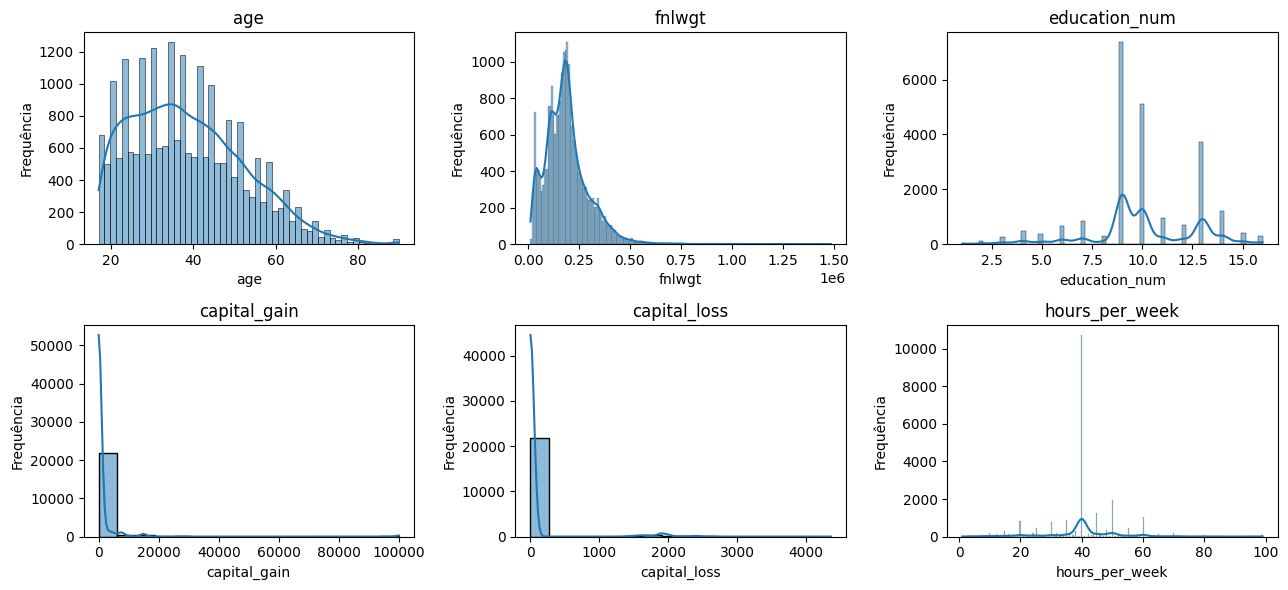

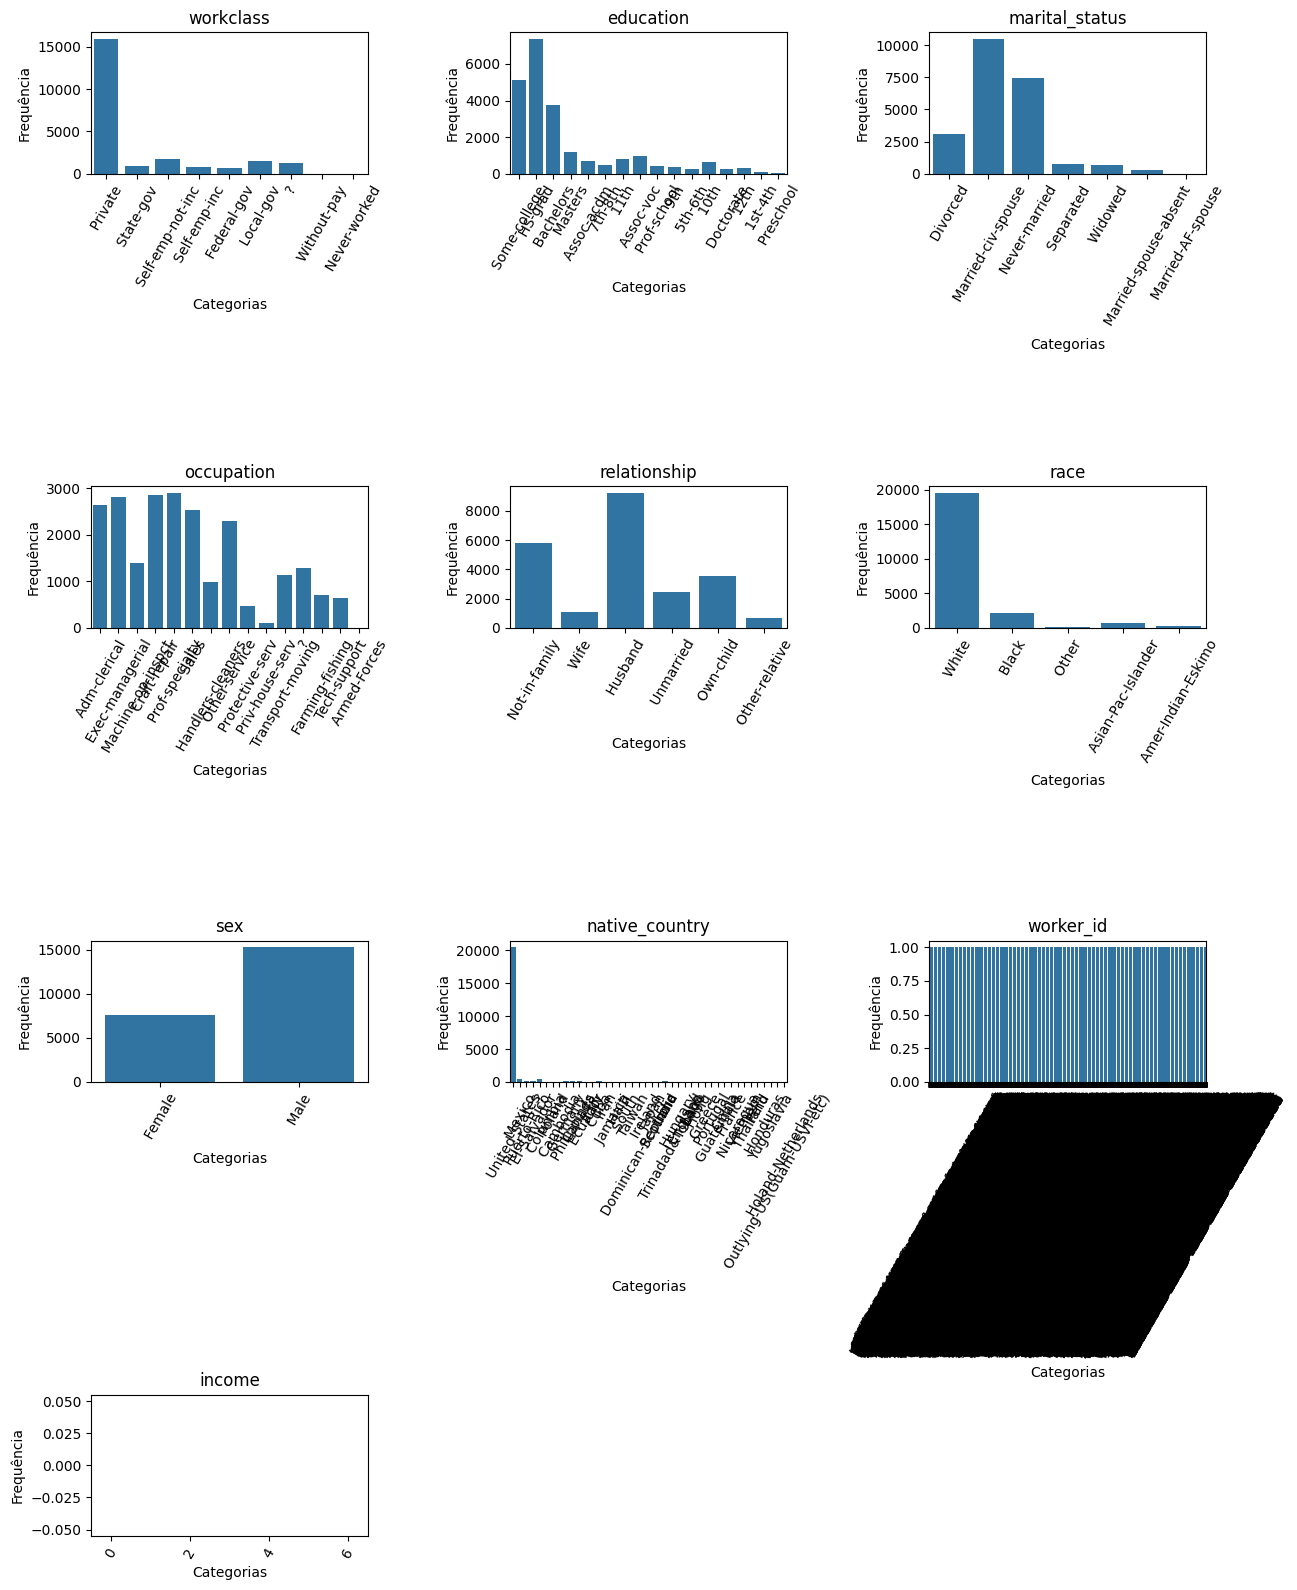


========== Correlação entre Variáveis ==========


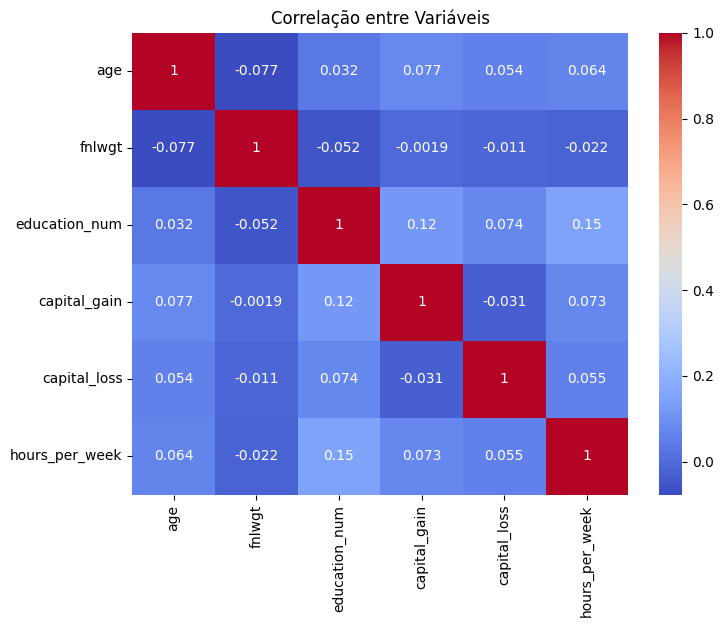

In [18]:
analisa_dados(abt)